# Apache TVM: тензорный компилятор для ML решений

## Установка TVM через pip

- Устанавливаем TVM:

In [ ]:
!pip install --pre apache-tvm~=0.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 15.2 MB/s eta 0:00:00


- Импортируем и проверяем версию TVM:

In [ ]:
import tvm
print(tvm.__version__)

0.12.dev54


# Компиляция модели

## Импорт модели в TVM

## Создание простой свёрточной модели для распознавания изображений из набора CIFAR-100

- Установим необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

- Уменьшим уровень логирования TensorFlow, чтобы игнорировать сообщения о том, с какими инструкциями TF был построен.

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

- Константы

In [ ]:
CLASSES       = 100
BATCH_SIZE    = 128
LEARNING_RATE = 1e-3

- Загрузим данные, разделим их на тренировочную и тестовую части:

In [ ]:
from keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 15s 0us/step


- Выводим размер изображения и отрисовываем его с помощью `matplotlib`:

Image shape:  (32, 32, 3)


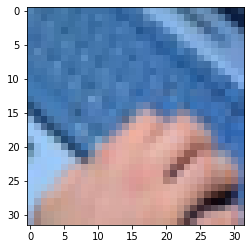

In [ ]:
print("Image shape: ", X_train[10].shape)
plt.imshow(X_train[10])

## Подготавливаем данные

- Добавляем размерность с каналом в массивы с тренировочными и тестовыми данными:

In [ ]:
y_train = (y_train == np.arange(CLASSES)).astype(np.float32)
y_test = (y_test == np.arange(CLASSES)).astype(np.float32)

## Создаём модель

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, BatchNormalization, Activation, MaxPooling2D, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=2, strides=(2, 2), input_shape=(32, 32, 3), padding="same", name="input"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=2, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2)),
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Dropout(0.2)),
model.add(Dense(64))
model.add(Dense(CLASSES, activation="softmax"))

- Компилируем и выводим информацию о модели:

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 16, 16, 64)        832       
                                                                 
 batch_normalization_26 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 activation_39 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 32)          8224      
                                                                 
 batch_normalization_27 (Bat  (None, 8, 8, 32)       

- Обучаем модель в течении 20-ти эпох

In [ ]:
result = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=BATCH_SIZE,
    epochs=20
)

Epoch 1/20
391/391 [==============================] - 6s 8ms/step - loss: 3.8020 - accuracy: 0.1363 - val_loss: 3.3369 - val_accuracy: 0.1988
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 3.1302 - accuracy: 0.2354 - val_loss: 2.9388 - val_accuracy: 0.2792
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 2.9052 - accuracy: 0.2821 - val_loss: 3.1890 - val_accuracy: 0.2358
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 2.7865 - accuracy: 0.3042 - val_loss: 2.7611 - val_accuracy: 0.3175
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 2.6961 - accuracy: 0.3228 - val_loss: 2.7848 - val_accuracy: 0.3104
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 2.6394 - accuracy: 0.3354 - val_loss: 2.6198 - val_accuracy: 0.3375
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 2.5897 - accuracy: 0.3452 - val_loss: 2.5933 - val_accuracy: 0.3507
Epoch 

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0) 
print(f"Model accuracy: {scores[1]:.4f}")

Model accuracy: 0.3771


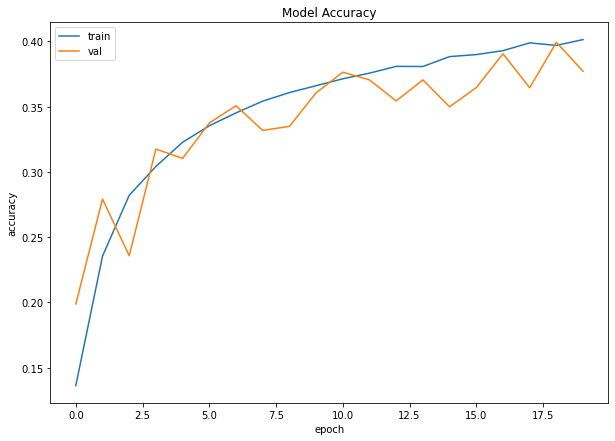

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- Проверяем точность на 20 элементах из тестовой выборки:

In [ ]:
print("Prediction: ", np.argmax(model.predict(X_test[:20]), axis=1))
print("Labels:     ", np.argmax(y_test[:20], axis=1))

1/1 [==============================] - 0s 43ms/step
Prediction:  [30 80 15 51 71  7 63 74 23  0 12 55 89 69 40 43 92 97 70 92]
Labels:      [49 33 72 51 71 92 15 14 23  0 71 75 81 69 40 43 92 97 70 53]


## Импортируем модель в TVM

- Подключаем необходимые модули:

In [ ]:
import tvm
from tvm import relay
from tvm.contrib import graph_executor

- Загружаем модель из Keras в TVM:

In [ ]:
input_shape = [1, 32, 32, 3] # [batch, height, width, channels]
shape_dict = {"input_input": input_shape}
mod = tvm.IRModule()
mod, params = relay.frontend.from_keras(model, shape_dict, layout="NHWC")
print(mod)

def @main(%input_input: Tensor[(1, 32, 32, 3), float32], %v_param_1: Tensor[(2, 2, 3, 64), float32], %v_param_2: Tensor[(64), float32], %v_param_3: Tensor[(64), float32], %v_param_4: Tensor[(64), float32], %v_param_5: Tensor[(64), float32], %v_param_6: Tensor[(64), float32], %v_param_7: Tensor[(2, 2, 64, 32), float32], %v_param_8: Tensor[(32), float32], %v_param_9: Tensor[(32), float32], %v_param_10: Tensor[(32), float32], %v_param_11: Tensor[(32), float32], %v_param_12: Tensor[(32), float32], %v_param_13: Tensor[(512), float32], %v_param_14: Tensor[(512), float32], %v_param_15: Tensor[(512), float32], %v_param_16: Tensor[(512), float32], %v_param_17: Tensor[(256, 512), float32], %v_param_18: Tensor[(256), float32], %v_param_19: Tensor[(64, 256), float32], %v_param_20: Tensor[(64), float32], %v_param_21: Tensor[(100, 64), float32], %v_param_22: Tensor[(100), float32]) {
  %0 = nn.conv2d(%input_input, %v_param_1, strides=[2, 2], padding=[0i64, 0i64, 0i64, 0i64], channels=64, kernel_size

- Указываем устройство, для которого модель должна быть скомпилирована и устройство, на котором модель будет запущена:

In [ ]:
target = tvm.target.Target("llvm")
dev = tvm.cpu(0)

- Строим модель и создаём для неё `GraphExecutor`:

In [ ]:
with tvm.transform.PassContext(opt_level=3):
    tvm_model = relay.build_module.create_executor("graph", mod, dev, target, params).evaluate()

- Проверяем точность модели, запущенной с помощью TVM:

In [ ]:
out = []
for data in X_test[:20]:
    out.append(tvm_model(data.reshape(1, 32, 32, 3)).numpy()[0])

print("Prediction: ", np.argmax(out, axis=1))
print("Labels:     ", np.argmax(y_test[:20], axis=1))

Prediction:  [30 80 15 51 71  7 63 74 23  0 12 55 89 69 40 43 92 97 70 92]
Labels:      [49 33 72 51 71 92 15 14 23  0 71 75 81 69 40 43 92 97 70 53]


# Настройка (тюнинг) модели в TVM

## Установка необходимых зависимостей

- Установим модули Python, которые могут потребоваться во время настройки моделей в TVM.

In [ ]:
# If you are using Mac OSX, you should first install OpenMP library (libomp)
!pip3 install --user tornado psutil 'xgboost<1.6.0' cloudpickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Некоторые общие функции и переменные

- Объявим некоторые общие переменные, которые будут использоваться во всех режимах тюнинга:

In [ ]:
model_name = "my_model"
input_name = "input_input"
target = tvm.target.Target("llvm")

import multiprocessing
# Set number of threads used for tuning based on the number of
# physical CPU cores on your machine.
num_threads = multiprocessing.cpu_count()
print("Num threads: ", int(num_threads/2))
os.environ["TVM_NUM_THREADS"] = str(int(num_threads/2))

Num threads:  1


- Следующая функция будет использоваться для оценки времени работы модели:

In [ ]:
def evaluate_performance(lib, data_shape, dtype="float32"):
    # upload parameters to device
    dev = tvm.cpu()
    data_tvm = tvm.nd.array((np.random.uniform(size=data_shape)).astype(dtype))
    module = graph_executor.GraphModule(lib["default"](dev))
    module.set_input(input_name, data_tvm)

    # evaluate
    print("Evaluate inference time cost...")
    print(module.benchmark(dev, number=100, repeat=3))

## AutoTVM

- Подключаем необходимые модули:

In [ ]:
from tvm import autotvm
from tvm.autotvm.tuner import XGBTuner, GATuner, RandomTuner, GridSearchTuner

In [ ]:
log_file = "/content/tvm/%s.autotvm.log" % model_name

- Определим функцию, которая будет отвечать за извлечение задач из модели:

In [ ]:
# extract workloads from relay program
def extract_tasks(mod, target, params):
    print("Mod:")
    print(mod)
    print("Extract tasks...")
    tasks = autotvm.task.extract_from_program(
        mod, target=target, params=params
    )
    assert(len(tasks) > 0)
    for idx, task in enumerate(tasks):
        print("Task: %d,  workload: %s" % (idx, task.workload))
    return tasks

- Извлечем задачи:

In [ ]:
tasks = extract_tasks(mod, target, params)

Mod:
def @main(%input_input: Tensor[(1, 32, 32, 3), float32], %v_param_1: Tensor[(2, 2, 3, 64), float32], %v_param_2: Tensor[(64), float32], %v_param_3: Tensor[(64), float32], %v_param_4: Tensor[(64), float32], %v_param_5: Tensor[(64), float32], %v_param_6: Tensor[(64), float32], %v_param_7: Tensor[(2, 2, 64, 32), float32], %v_param_8: Tensor[(32), float32], %v_param_9: Tensor[(32), float32], %v_param_10: Tensor[(32), float32], %v_param_11: Tensor[(32), float32], %v_param_12: Tensor[(32), float32], %v_param_13: Tensor[(512), float32], %v_param_14: Tensor[(512), float32], %v_param_15: Tensor[(512), float32], %v_param_16: Tensor[(512), float32], %v_param_17: Tensor[(256, 512), float32], %v_param_18: Tensor[(256), float32], %v_param_19: Tensor[(64, 256), float32], %v_param_20: Tensor[(64), float32], %v_param_21: Tensor[(100, 64), float32], %v_param_22: Tensor[(100), float32]) {
  %0 = nn.conv2d(%input_input, %v_param_1, strides=[2, 2], padding=[0i64, 0i64, 0i64, 0i64], channels=64, kernel

Task: 0,  workload: ('dense_nopack.x86', ('TENSOR', (1, 512), 'float32'), ('TENSOR', (256, 512), 'float32'), None, 'float32')
Task: 1,  workload: ('dense_pack.x86', ('TENSOR', (1, 512), 'float32'), ('TENSOR', (256, 512), 'float32'), None, 'float32')
Task: 2,  workload: ('dense_nopack.x86', ('TENSOR', (1, 256), 'float32'), ('TENSOR', (64, 256), 'float32'), None, 'float32')
Task: 3,  workload: ('dense_pack.x86', ('TENSOR', (1, 256), 'float32'), ('TENSOR', (64, 256), 'float32'), None, 'float32')
Task: 4,  workload: ('dense_nopack.x86', ('TENSOR', (1, 64), 'float32'), ('TENSOR', (100, 64), 'float32'), None, 'float32')
Task: 5,  workload: ('dense_pack.x86', ('TENSOR', (1, 64), 'float32'), ('TENSOR', (100, 64), 'float32'), None, 'float32')


- Определим функцию, которая будет запускать настройку модели:

In [ ]:
def run_tuning(
    tasks, measure_option, tuner="gridsearch", early_stopping=None, log_filename="tuning.log"
):
    for i, task in enumerate(tasks):
        prefix = "[Task %2d/%2d] " % (i + 1, len(tasks))

        # create tuner
        if tuner == "xgb" or tuner == "xgb-rank":
            tuner_obj = XGBTuner(task, loss_type="rank")
        elif tuner == "ga":
            tuner_obj = GATuner(task, pop_size=50)
        elif tuner == "random":
            tuner_obj = RandomTuner(task)
        elif tuner == "gridsearch":
            tuner_obj = GridSearchTuner(task)
        else:
            raise ValueError("Invalid tuner: " + tuner)

        # do tuning
        n_trial = len(task.config_space)
        tuner_obj.tune(
            n_trial=n_trial,
            early_stopping=early_stopping,
            measure_option=measure_option,
            callbacks=[
                autotvm.callback.progress_bar(n_trial, prefix=prefix),
                autotvm.callback.log_to_file(log_filename),
            ],
        )

- Определим настройки замера:

In [ ]:
measure_option = autotvm.measure_option(
    builder=autotvm.LocalBuilder(),
    runner=autotvm.LocalRunner(repeat=10, enable_cpu_cache_flush=True),
)

- Запускаем тюнинг:

In [ ]:
# run tuning tasks
run_tuning(tasks, measure_option, tuner="xgb", log_filename=log_file)

[Task  2/ 6]  Current/Best:    2.92/  12.85 GFLOPS | Progress: (62/450) | 43.20 s Done.
[Task  2/ 6]  Current/Best:    1.55/  13.67 GFLOPS | Progress: (450/450) | 330.14 s Done.
[Task  3/ 6]  Current/Best:    4.34/  11.33 GFLOPS | Progress: (63/63) | 40.92 s Done.
[Task  4/ 6]  Current/Best:    3.14/  13.20 GFLOPS | Progress: (252/252) | 124.43 s Done.
[Task  5/ 6]  Current/Best:    6.75/  11.29 GFLOPS | Progress: (63/63) | 30.25 s Done.
[Task  6/ 6]  Current/Best:    2.74/  11.18 GFLOPS | Progress: (252/252) | 106.45 s Done.


- Определим функцию для оценки эффективности настройки модели:

In [ ]:
def evaluate(module, data_shape, log_file, target="llvm"):
    # compile kernels in default mode
    print("Evaluation of the network compiled in 'default' mode without auto tune:")
    with tvm.transform.PassContext(opt_level=3):
        print("Compile...")
        lib = relay.build(module, target=target, params=params)
        evaluate_performance(lib, data_shape)

    # compile kernels in kernel tuned only mode
    print("\nEvaluation of the network been tuned on kernel level:")
    with autotvm.apply_history_best(log_file):
        print("Compile...")
        with tvm.transform.PassContext(opt_level=3):
            lib = relay.build(module, target=target, params=params)
        evaluate_performance(lib, data_shape)

- Запустим функцию и оценим полученную производительность:

In [ ]:
evaluate(mod, input_shape, log_file, target)

Evaluation of the network compiled in 'default' mode without auto tune:
Compile...


Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   0.7912       0.7768       0.8229       0.7738       0.0225   
               

Evaluation of the network been tuned on kernel level:
Compile...


Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   0.6742       0.6682       0.7035       0.6510       0.0218   
               


Как можно видеть, время запуска изменилось не на много. Это связано с тем, что основное время исполнения занимают свёрточные слои и настроенные полносвязанные слои не сильно влияют на ситуацию.

## Auto-Scheduler

- Подключаем необходимые модули:

In [ ]:
from tvm import auto_scheduler

- Устанавливаем значение переменной `log_file`:

In [ ]:
log_file = "/content/tvm/%s.auto-scheduler.log" % model_name

- Определим функцию, которая будет отвечать за извлечение задач из модели:

In [ ]:
# extract workloads from relay program
def extract_tasks(mod, target, params):
    print("Mod:")
    print(mod)
    print("Extract tasks...")
    tasks, task_weights = auto_scheduler.extract_tasks(mod, params, target)
    assert(len(tasks) > 0)

    for idx, task in enumerate(tasks):
        print("Task: %d, desc: %s" % (idx, task.desc))
    return tasks, task_weights

- Извлечем задачи:

In [ ]:
tasks, task_weights = extract_tasks(mod, target, params)

Mod:
def @main(%input_input: Tensor[(1, 32, 32, 3), float32]) {
  %0 = nn.conv2d(%input_input, meta[relay.Constant][0], strides=[2, 2], padding=[0i64, 0i64, 0i64, 0i64], channels=64, kernel_size=[2, 2], data_layout="NHWC", kernel_layout="HWIO");
  %1 = nn.bias_add(%0, meta[relay.Constant][1], axis=-1);
  %2 = nn.batch_norm(%1, meta[relay.Constant][2], meta[relay.Constant][3], meta[relay.Constant][4], meta[relay.Constant][5], axis=3, epsilon=0.001f);
  %3 = %2.0;
  %4 = nn.relu(%3);
  %5 = nn.max_pool2d(%4, pool_size=[2, 2], strides=[2, 2], padding=[0, 0, 0, 0], layout="NHWC");
  %6 = nn.conv2d(%5, meta[relay.Constant][6], padding=[0i64, 0i64, 1i64, 1i64], channels=32, kernel_size=[2, 2], data_layout="NHWC", kernel_layout="HWIO");
  %7 = nn.bias_add(%6, meta[relay.Constant][7], axis=-1);
  %8 = nn.batch_norm(%7, meta[relay.Constant][8], meta[relay.Constant][9], meta[relay.Constant][10], meta[relay.Constant][11], axis=3, epsilon=0.001f);
  %9 = %8.0;
  %10 = nn.relu(%9);
  %11 = nn.max_p

- Определим функцию, которая будет запускать настройку модели:

In [ ]:
def run_tuning(tasks, task_weights, log_file, n_trials):
    print("Begin tuning...")
    tuner = auto_scheduler.TaskScheduler(tasks, task_weights)
    tune_option = auto_scheduler.TuningOptions(
        num_measure_trials=n_trials,  # change this to 20000 to achieve the best performance
        runner=auto_scheduler.LocalRunner(repeat=10, enable_cpu_cache_flush=True),
        measure_callbacks=[auto_scheduler.RecordToFile(log_file)],
    )

    tuner.tune(tune_option)

- Запускаем тюнинг:

In [ ]:
run_tuning(tasks, task_weights, log_file,  512)

Begin tuning...
|  ID  |                       Task Description                        | Latency (ms) | Speed (GFLOPS) | Trials |
-----------------------------------------------------------------------------------------------------------------
|    0 |             vm_mod_fused_nn_conv2d_add_multiply_add_nn_relu_1 |            - |              - |      0 |
|    1 |                                    vm_mod_fused_nn_max_pool2d |            - |              - |      0 |
|    2 |                                  vm_mod_fused_nn_max_pool2d_1 |            - |              - |      0 |
|    3 |                                       vm_mod_fused_nn_softmax |            - |              - |      0 |
|    4 |                                   vm_mod_fused_nn_dense_add_2 |            - |              - |      0 |
|    5 |               vm_mod_fused_nn_conv2d_add_multiply_add_nn_relu |            - |              - |      0 |
|    6 |                                   vm_mod_fused_nn_dense_add_1 |

- Модифицируем функцию для оценки эффективности настройки модели:

In [ ]:
def evaluate(module, data_shape, log_file, target="llvm"):
    # compile kernels in default mode
    print("Evaluation of the network compiled in 'default' mode without auto tune:")
    with tvm.transform.PassContext(opt_level=3):
        print("Compile...")
        lib = relay.build(module, target=target, params=params)
        evaluate_performance(lib, data_shape)

    # compile kernels in kernel tuned only mode
    print("\nEvaluation of the network been tuned on kernel level:")
    with auto_scheduler.ApplyHistoryBest(log_file):
        print("Compile...")
        with tvm.transform.PassContext(opt_level=3, config={"relay.backend.use_auto_scheduler": True}):
            lib = relay.build(module, target=target, params=params)
        evaluate_performance(lib, data_shape)

- Запустим функцию и оценим полученную производительность:

In [ ]:
evaluate(mod, input_shape, log_file, target)

Evaluation of the network compiled in 'default' mode without auto tune:
Compile...


Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   0.6951       0.7028       0.7035       0.6791       0.0113   
               

Evaluation of the network been tuned on kernel level:
Compile...
Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   0.0968       0.0957       0.1001       0.0945       0.0024   
               


Как можно видеть, Auto-Scheduler дал уже довольно значительный прирост производительности в сравнении с расписанием "по умолчанию". Такое ускорение в сравнении с AutoTVM объясняется тем, что для Auto-Scheduler не нужно расписание, написанное полльзователем, и он сам на основе различных оптимизаций автоматически ускорил свёрточные слои в нашей модели.

## Meta-Scheduler (TensorIR)

- Подключаем необходимые модули:

In [ ]:
from tvm import meta_schedule as ms

- Объявляем некоторые Meta-Schedule специфичные переменные:

In [ ]:
strategy_name = "evolutionary"
work_dir = "/content/tvm/{}_meta-scheduler_{}".format(model_name, strategy_name)
target = tvm.target.Target("llvm -mcpu=core-avx2 -num-cores {}".format(int(num_threads/2)))

- Определим функцию, которая будет отвечать за извлечение задач из модели:

In [ ]:
# extract workloads from relay program
def extract_tasks(mod, target, params, strategy):
    print("Mod:")
    print(mod)
    print("Extract tasks...")
    extracted_tasks = ms.relay_integration.extract_tasks(
        mod, target, params
    )
    assert(len(extracted_tasks) > 0)
    
    tasks, task_weights = ms.relay_integration.extracted_tasks_to_tune_contexts(
        extracted_tasks, work_dir, strategy=strategy
    )

    for idx, task in enumerate(tasks):
        print("Task: %d, desc: %s" % (idx, task.task_name))

    return tasks, task_weights

- Извлечем задачи:

In [ ]:
tasks, task_weights = extract_tasks(mod, target, params, strategy_name)

Mod:
def @main(%input_input: Tensor[(1, 32, 32, 3), float32]) {
  %0 = nn.conv2d(%input_input, meta[relay.Constant][0], strides=[2, 2], padding=[0i64, 0i64, 0i64, 0i64], channels=64, kernel_size=[2, 2], data_layout="NHWC", kernel_layout="HWIO");
  %1 = nn.bias_add(%0, meta[relay.Constant][1], axis=-1);
  %2 = nn.batch_norm(%1, meta[relay.Constant][2], meta[relay.Constant][3], meta[relay.Constant][4], meta[relay.Constant][5], axis=3, epsilon=0.001f);
  %3 = %2.0;
  %4 = nn.relu(%3);
  %5 = nn.max_pool2d(%4, pool_size=[2, 2], strides=[2, 2], padding=[0, 0, 0, 0], layout="NHWC");
  %6 = nn.conv2d(%5, meta[relay.Constant][6], padding=[0i64, 0i64, 1i64, 1i64], channels=32, kernel_size=[2, 2], data_layout="NHWC", kernel_layout="HWIO");
  %7 = nn.bias_add(%6, meta[relay.Constant][7], axis=-1);
  %8 = nn.batch_norm(%7, meta[relay.Constant][8], meta[relay.Constant][9], meta[relay.Constant][10], meta[relay.Constant][11], axis=3, epsilon=0.001f);
  %9 = %8.0;
  %10 = nn.relu(%9);
  %11 = nn.max_p

Meta-Scheduler извлёк на одну задачу больше, чем Auto-Scheduer. К задачам добавился ещё слой `batch_flatten`.

- Определим функцию, которая будет запускать настройку модели:

In [ ]:
import os

def run_tuning(tasks, task_weights, work_dir, n_trials):
    if not os.path.exists(work_dir):
        os.mkdir(work_dir)
    print("Begin tuning...")    
    evaluator_config = ms.runner.config.EvaluatorConfig(number=1, repeat=10, enable_cpu_cache_flush=True);
    database = ms.tune.tune_tasks(
        tasks=tasks,
        task_weights=task_weights,
        work_dir=work_dir,
        max_trials_global=n_trials,
        num_trials_per_iter=64,
        max_trials_per_task=256,
        builder=ms.builder.LocalBuilder(),
        runner=ms.runner.LocalRunner(evaluator_config=evaluator_config),
    )

- Запускаем тюнинг:

In [ ]:
run_tuning(tasks, task_weights, work_dir, 512)

Выходные данные были обрезаны до нескольких последних строк (500).
2023-02-15 18:21:14 [DEBUG] XGB stopped. Best iteration: [39] tr-p-rmse:0.073161	tr-a-peak@32:1	tr-rmse:0.410449	tr-rmse:0.410449 
2023-02-15 18:21:14 [DEBUG] XGB stopped. Best iteration: [39] tr-p-rmse:0.073161	tr-a-peak@32:1	tr-rmse:0.410449	tr-rmse:0.410449 
2023-02-15 18:21:14 [DEBUG] XGB stopped. Best iteration: [39] tr-p-rmse:0.073161	tr-a-peak@32:1	tr-rmse:0.410449	tr-rmse:0.410449 
2023-02-15 18:21:14 [DEBUG] XGB stopped. Best iteration: [39] tr-p-rmse:0.073161	tr-a-peak@32:1	tr-rmse:0.410449	tr-rmse:0.410449 
2023-02-15 18:21:14 [DEBUG] XGB stopped. Best iteration: [39] tr-p-rmse:0.073161	tr-a-peak@32:1	tr-rmse:0.410449	tr-rmse:0.410449 
2023-02-15 18:21:14 [DEBUG] XGB stopped. Best iteration: [39] tr-p-rmse:0.073161	tr-a-peak@32:1	tr-rmse:0.410449	tr-rmse:0.410449 
2023-02-15 18:21:14 [DEBUG] XGB stopped. Best iteration: [39] tr-p-rmse:0.073161	tr-a-peak@32:1	tr-rmse:0.410449	tr-rmse:0.410449 
2023-02-15 18:21

- Модифицируем функцию для оценки эффективности настройки модели:

In [77]:
def evaluate(module, data_shape, work_dir, target="llvm"):
    # compile kernels in default mode
    print("Evaluation of the network compiled in 'default' mode without auto tune:")
    with tvm.transform.PassContext(opt_level=3):
        print("Compile...")
        lib = relay.build(module, target=target, params=params)
        evaluate_performance(lib, data_shape)

    # compile kernels in kernel tuned only mode
    print("\nEvaluation of the network been tuned on kernel level:")
    print("Compile...")
    database = ms.database.JSONDatabase(f"{work_dir}/database_workload.json",
                                        f"{work_dir}/database_tuning_record.json",
                                        allow_missing=False)
    with tvm.transform.PassContext(opt_level=3):
        lib = ms.relay_integration.compile_relay(database, module, target, params)
        evaluate_performance(lib, data_shape)

- Запустим функцию и оценим полученную производительность:

In [78]:
evaluate(mod, input_shape, work_dir, target)

Evaluation of the network compiled in 'default' mode without auto tune:
Compile...


Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   0.7478       0.7559       0.7587       0.7288       0.0135   
               

Evaluation of the network been tuned on kernel level:
Compile...
Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   0.0648       0.0648       0.0649       0.0646       0.0001   
               


Результаты, полученные при настройке с Meta-Scheduler, оказались лучше, чем результаты с Auto-Scheduler.